#### 40/43. Good Job Tai. 

## DATA3OO - Homework 2
## Fall 2023 - Professor Kennedy Odongo
## Tai Nguyen


## I. Theoretical part

1. 3 of the time series models that can be used for forecasting:
- AR (autoregressive) model
- MA (moving average) model
- ARMA model 

2. Two real-world applications of time series:
- Financial forecasting (such as stocks): Traders and investors rely on historical price and volume data to identify trends, patterns, and potential future price movements.
- Energy consumption prediction: By analyzing historical data of energy usage, weather conditions, and other relevant factors, energy companies and utility providers  can optimize energy production, distribution, and pricing. 

3. Difference between time series dataset and panel dataset
- A times series dataset involves N sample units with only one variable which is recorded on T different timestampsm, whereas a panel dataset involves N samples units with multiple variables and each variable is further recorded on T different timestamps.

4. In time series, we should always use the first K-periods t1, t2, ... tK as the training set, and the rest of the periods as the holdout/test set. Meanwhile in regression or classification, it is recommended to pick randomly a portion of the dataset (usually 80%) as the training set, and the rest as the holdout set.

5. Term denifications:
- Stationarity: a stationary time series is a time series with no predictable pattern over time. Stationarity is needed to stabilize the variance.

- Differencing: a method often used to make a process stationary in time series. While differencing can be performed multiple times, we almost never have to do it more than twice.

- White noise: a white noise series is a series of observations that are independently and identically distributed with a mean of 0 and constant variance. For example: the iireducible error term in supervised learning models is a whitenoise.

- Random walk: a random walk series is a series of observations where the current observation equals to the previous observation with a random step up and down. For example: the stock market

6.

a) Interpretation
- c: the constant term that is often set to 0
- ε: is a white noise error term at time t, which is assumed to have mean of 0 and constant variance.
- ϕ: is the auto-regressive parameter, representing the relationship between the current value Xt and its past values Xt-i with i ranging from 1 to 3
- θ: are the moving average parameters, representing the relationship between the current value Xt and its past forecast errors εt-i with i ranging from 1 to 4
- εt-i: past forecast errors of Xt

b) The time series has not been differenced based on the above ARMA equation. If differencing has been applied, it would be reflected in the transformed series (e.g., Xt - Xt-1, Xt - Xt-2, etc.), but the model equation itself doesn't show this transformation.

c) 
- The Autoregressive (AR) order is determined by the number of autoregressive terms, which in this case is p = 3. So, the AR order (p) is 3 because there are three autoregressive terms: ϕ1Xt-1, ϕ2Xt-2, ϕ3Xt-3
- The Moving Average (MA) order is determined by the number of moving average terms, which in this case is q = 4. So, the MA order (q) is 4 because there are four moving average terms: θ1Xt-1, θ2Xt-2, θ3Xt-3, θ4Xt-4

d)
- Use PACF to identify the number of lags for an AR model.
- Use ACF to identify number of lags for a MA model.

## II. Programming Part

In [79]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import pmdarima as pm # v 1.8.5
import statsmodels.api as sm # v 0.13.5
import matplotlib.pyplot as plt # 3.6.3
import pandas_profiling as pp # v 3.6.3
import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.5

from statsmodels.tsa.stattools import adfuller # v 0.13.5
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.5
from statsmodels.tsa.arima_model import ARIMA # v 0.13.5

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

%matplotlib inline

### 1. EDA


In [113]:
# read in the dataset
electricity = pd.read_csv("/Users/tainguyen103/Downloads/Electric_Production.csv")

#show first 10 rows of dataset
electricity.head(10) 

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
5,6/1/1985,58.0904
6,7/1/1985,62.6202
7,8/1/1985,63.2485
8,9/1/1985,60.5846
9,10/1/1985,56.3154


In [81]:
# show last 10 rows of dataset
electricity.tail(10)

,DATE,IPG2211A2N
387,4/1/2017,88.3530
388,5/1/2017,92.0805
389,6/1/2017,102.1532
390,7/1/2017,112.1538
391,8/1/2017,108.9312
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


### The column name of "IPG2211A2N" is not really descriptive in terms of electrical production. We want to rename this column and also lower the captial case of the DATE column to make the variables' names more consistent

In [117]:
electricity = electricity.rename(columns = {"DATE" : "Date","IPG2211A2N" : "kW"})
electricity.head()

,Date,kW
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [83]:
electricity.shape # data has 397 rows and 2 columns

(397, 2)

In [115]:
# see data types
electricity.dtypes 

Date     object
kW      float64
dtype: object

In [118]:
# notice that the DATE datatype is object. We want this variable to be a datetime datatype
electricity["Date"] = pd.to_datetime(electricity["Date"])
electricity.dtypes #verify 

Date    datetime64[ns]
kW             float64
dtype: object

In [119]:
# sort the values of the DATE column by chronological order
electricity = electricity.sort_values("Date")

In [87]:
# find missing values
electricity.isna().sum() 

Date    0
kW      0
dtype: int64

In [88]:
# summary statistics
electricity.describe()

,kW
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


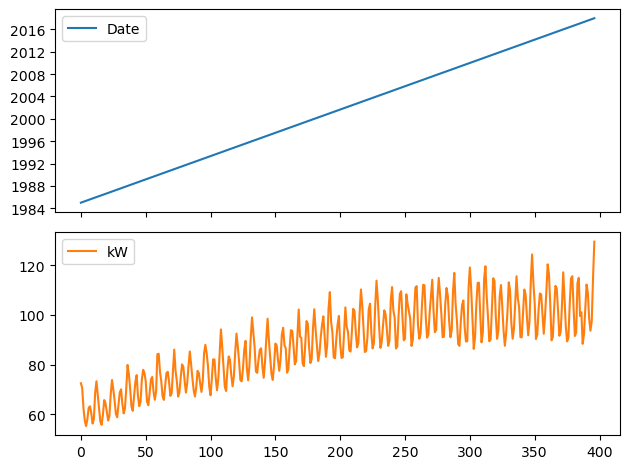

In [89]:
# visualize variables
electricity.plot(subplots=True) # why are you plotting the date? 
plt.tight_layout()
plt.show()

### Notice that although there are fluctuations, the kW variable generally has an increasing trend over time

In [90]:
# create a profile report of the dataset
pp.ProfileReport(electricity)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2. Check for stationarity using KPSS & ADF tests

###  For timeseries analysis, we need to make sure that the data is stationary before we fit machine learning models. KPSS is one of the methods we can use to check about this. 

### KPSS

In [121]:
for i in electricity.columns:
    print(i)
    print()
    print(stattools.kpss(electricity[i], regression='ct', nlags = 'auto', store=False))
    print()

Date

(0.017153236079306917, 0.1, 7, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

kW

(0.5051030832418743, 0.01, 16, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})



/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### For the both variables, we see that the p-values are 0.1 and 0.01 respectively as the output - also the boundary points. This implies that the test statistics are outside the critical value interval (0.01, 0.1) and that the null-hypothesis is true - the data is non-stationary

### We use the Dickey Fuller test or variations of it to check again. Below we define a function that takes in one - time series variable and returns the ADF statistic, lags used, p value and observations. We then run a loop through the variables in the dataset to obtain these information for each variable

### ADF

In [92]:
# returns the ADF value at the 5% significant level
def adfuller_test(timeseries):
    result=adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [93]:
# loops through all columns in the data set and determine whether each variable is stationary using the above function
for i in electricity.columns:
    print(i)
    adfuller_test(electricity[i])
    print()

Date
ADF Test Statistic : -0.14017905755768442
p-value : 0.9452865588328139
#Lags Used : 12
Number of Observations : 384
weak evidence against null hypothesis,indicating it is non-stationary 

kW
ADF Test Statistic : -2.256990350047239
p-value : 0.18621469116586975
#Lags Used : 15
Number of Observations : 381
weak evidence against null hypothesis,indicating it is non-stationary 



In [120]:
# prints solely the adfuller function to return raw ADF statistics for each variable
for i in electricity.columns:
    print(i)
    print()
    print(adfuller(electricity[i]))
    print() 

Date

(-0.14017905755768442, 0.9452865588328139, 12, 384, {'1%': -3.4474946672686824, '5%': -2.8690962436986855, '10%': -2.570795299750434}, 24217.455634478458)

kW

(-2.256990350047239, 0.18621469116586975, 15, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1840.8474501627156)



### For the kW variable, we see that 
- T-statistic is -2.256990350047239 : The negative sign suggests that the data is tending towards non-stationarity.
- MacKinnon’s approximate p-value is 0.18621469116586975 -> p-value is much greater than 0.05, which fails to reject the null hypothesis and concludes that the data is non-stationary.

Likewise, the Date variable is also non-stationary.


### 3. Differencing and plot variables

### Since the data is non-stationary, we need to perform differencing on the variables before we fit them into the model. Differencing is a method used to make a process stationary

#### Why are you plotting the date column?

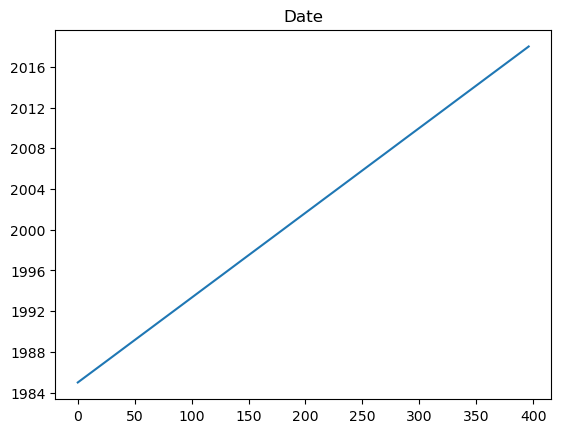

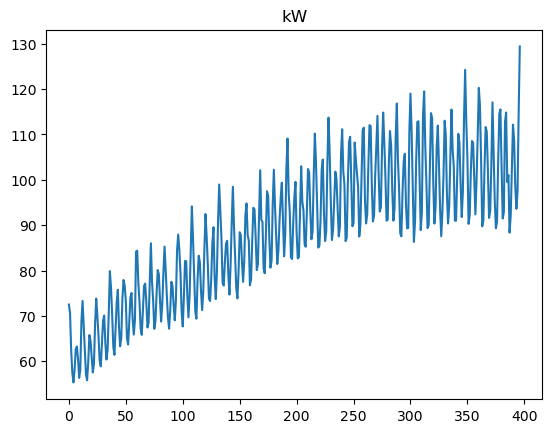

In [95]:
# plot raw variables
for i, col in enumerate(electricity.columns):
    electricity[col].plot(fig=plt.figure(i)) 
    plt.title(col)

plt.show()

### Without differencing (just yet), based on the plots, we see that the variables have a predictable pattern over time. Our next goal, which is differencing, is to make them not have a predictable pattern. 

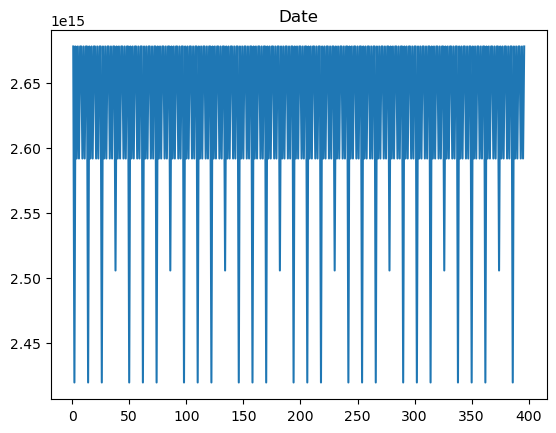

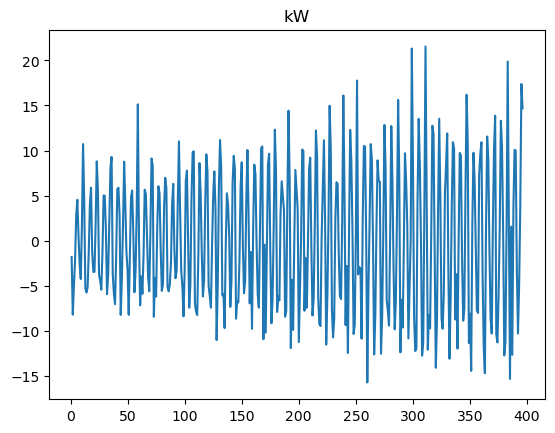

In [96]:
# plot once-differenced variables
for i, col in enumerate(electricity.columns):
    electricity[col].diff().plot(fig=plt.figure(i))
    plt.title(col)

plt.show() 

### After once-differencing, we are now able to start seeing the non-predictability in the data based on the plots. However, we will also try to do it once again, which is the second-order differencing, to see if it can achieve our objective at its best. 

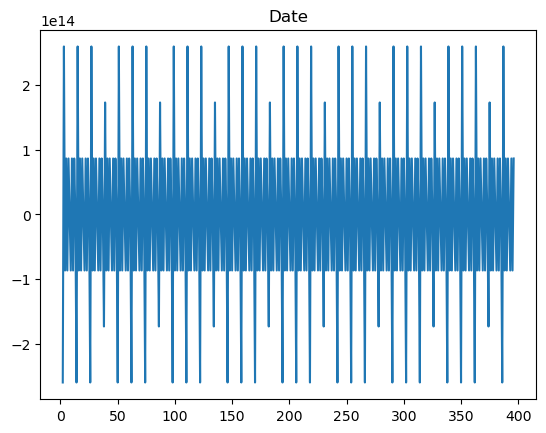

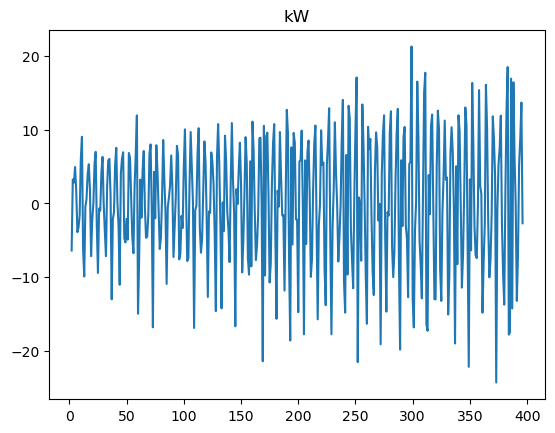

In [97]:
# plot twice-differenced variables
for i, col in enumerate(electricity.columns):
    electricity[col].diff().diff().plot(fig=plt.figure(i))
    plt.title(col)

plt.show() 

### 4. Plot PACF & ACF graphs. Determine ARMA order

### Now that we have determined that each of the variables are stationary, we want to produce the Autocorrelation Function (ACF) Plot & Partial Autocorrelation Function (PACF) plots for each variable. The ACF plot determines the number of Moving Average (MA) terms we can use and the PACF plot determines the number of Autoregressive (AR) Terms that we can use.

Date

kW



/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


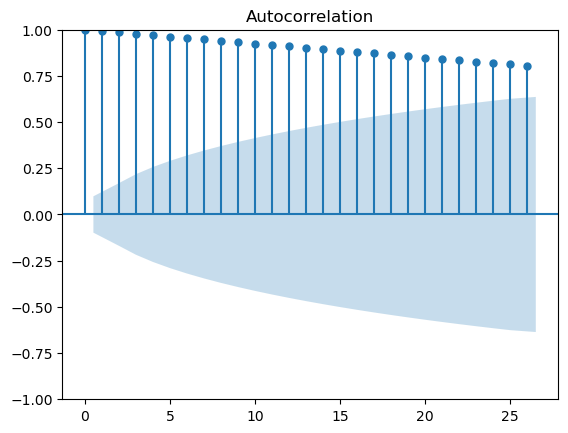

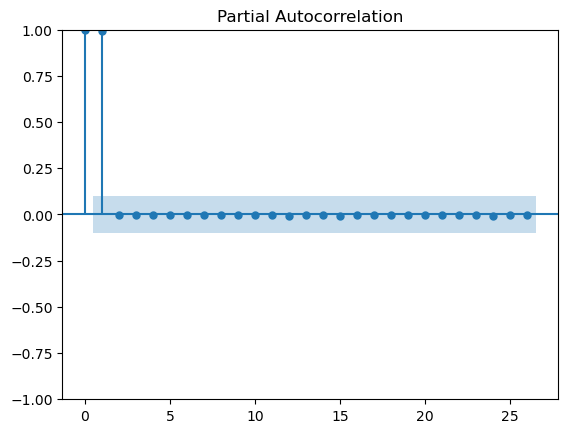

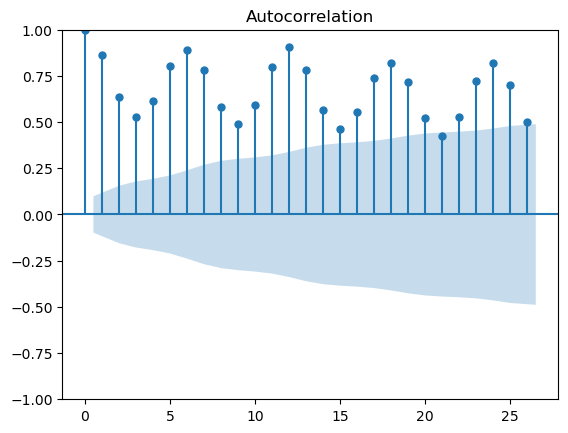

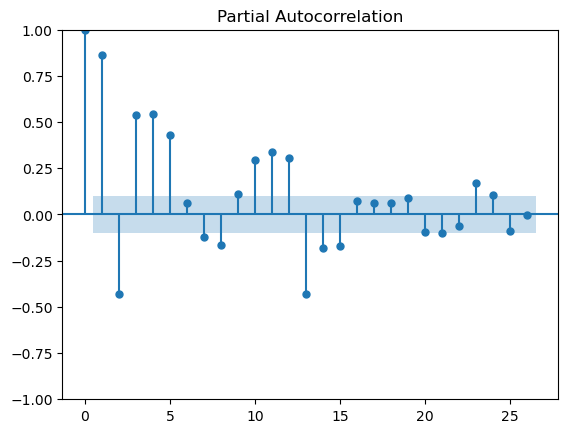

In [98]:
# plots the ACF and PACF plots for all the series in the data
def acf_pacf(series) -> plt.plot:
    return plot_acf(series), plot_pacf(series)

for i in electricity.columns:
    print(i)
    acf_pacf(electricity[i]) ####  this plots are supposed to be called only on stationary data (-2)
    print()

In [99]:
# determines the ARIMA order
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

columns = ["Date", "kW"]

for i in columns:
    print(i)
    arimamodel(electricity[i])
    print()

Date
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=29306.952, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=33086.888, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=34067.317, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=32713.588, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=29304.953, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(

### 5. ARIMA (p, d, q) order
We picked an ARIMA(p, d, q) order of ARIMA(4,0,2) for the kW variable based on the best model generated from running the *arimamodel* function

#### How did you pick this ARIMA order? (-2)

### 6. Fit model based on determined training set

### We proceed to fitting the model. We will select a training set of 80% and the ARIMA order determined above for the kW variable.

In [100]:
model = sm.tsa.arima.ARIMA(electricity['kW'].head(int(0.8*len(electricity))), order=(4, 0, 2))
results = model.fit()

/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [101]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     kW   No. Observations:                  317
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -880.307
Date:                Mon, 02 Oct 2023   AIC                           1776.614
Time:                        12:53:54   BIC                           1806.685
Sample:                             0   HQIC                          1788.626
                                - 317                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.1475     28.638      2.973      0.003      29.018     141.277
ar.L1          0.9350      0.053     17.718      0.000       0.832       1.038
ar.L2          0.1455      0.053      2.730      0.006       0.041       0.250
ar.L3         -0.8963      0.050    -18.079      0.000      -0.993      -0.799
ar.L4          0.8148      0.036     22.649      0.000       0.744       0.885
ma.L1          0.1303      0.050      2.603      0.009       0.032       0.228
ma.L2         -0.8127      0.045    -18.075      0.000      -0.901      -0.725
sigma2        14.7741      1.049     14.079      0.000      12.717      16.831
===================================================================================
Ljung-Box (L1) (Q):                   8.77   Jarque-Bera (JB):                 7.90
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               2.10   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 7. Forecasting

In [102]:
electricity['kW_forecast'] = results.predict(start = int(0.8*len(electricity))+1, 
                                                     end=len(electricity), 
                                                     dynamic=True)

/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

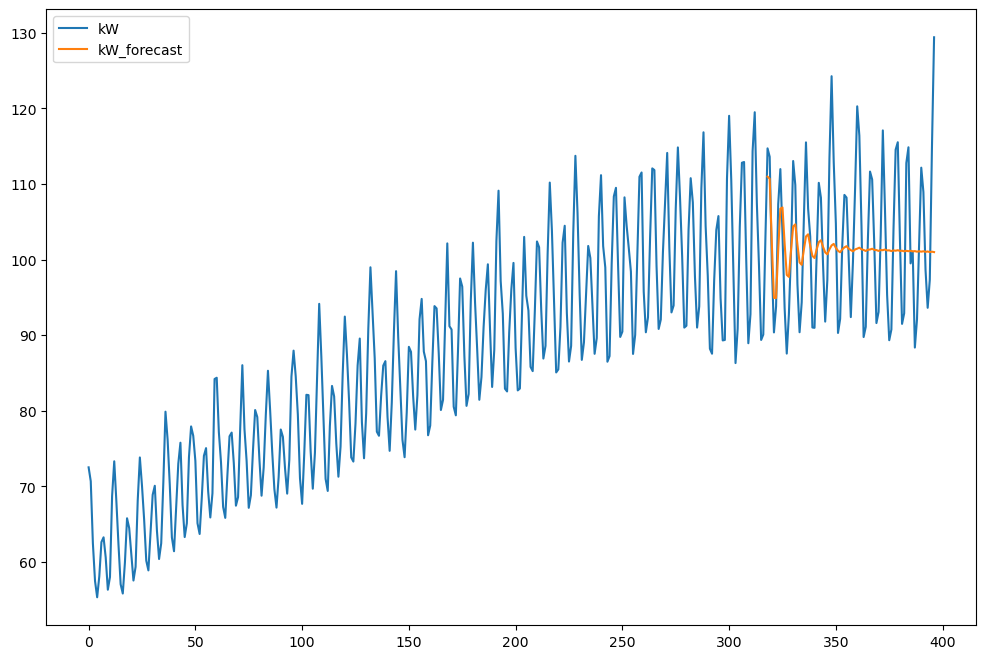

In [103]:
electricity[['kW','kW_forecast']].plot(figsize=(12,8))

### 8. MSE & MAE report

In [104]:
# MSE
mean_squared_error(electricity['kW_forecast'].tail(int(0.2*len(electricity))),
                   electricity['kW'].tail(int(0.2*len(electricity))))

81.6392493696333

In [105]:
# MAE
mean_absolute_error(electricity['kW_forecast'].tail(int(0.2*len(electricity))),
                    electricity['kW'].tail(int(0.2*len(electricity))))

7.348750668710269

In [106]:
# MAPE
mean_absolute_percentage_error(electricity['kW_forecast'].tail(int(0.2*len(electricity))),
                               electricity['kW'].tail(int(0.2*len(electricity))))


0.07248683740589182

### 9. Conclusion

### The mean squared error (MSE) and mean absolute error (MAE) are common metrics used to evaluate the performance of forecasting models. With the generated results above, MSE value of 81.64 indicates that, on average, the ARIMA model's predictions are off by about 81.64 units squared. Meanwhile, the MAE value of 7.35 indicates that, on average, the ARIMA model's predictions are off by about 7.35 units. The MAPE value of approximately 7.25% suggests that, on average, the ARIMA model's predictions have a relative error of 7.25% when compared to the actual values.

### Given the above results, there is still room for improvement in the model as it is not really effective. 
